### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

**自变量：** 文件条件（一致/不一致）  
**因变量：** 同一参与者读出不同文件条件的文字打印颜色所花费的时间

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

未知总体标准差，样本量为24（小样本）适合T检验  
因为实验数据为同一个实验者在两个不同文件条件下实验所得，因此两组数据属于相关样本数据，适合采用T检验的配对T检验。  
μ0：一致文件条件下各参与者完成挑战所耗费时间的总体均值  
μ1：不一致文件条件下各参与者完成挑战所耗费时间的总体均值

**H0:** 文件条件类型对参与者完成任务的时间没有影响（没有关联）μ0 = μ1  
**H1:** 文件条件类型对参与者完成任务的时间存在影响（有关联）μ0！= μ1  
  
**T检验类型：** 配对T检验  


现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

## 在这里执行你的分析

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
%matplotlib inline 

In [4]:
df_stroop = pd.read_csv('stroopdata.csv')
df_stroop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [5]:
df_stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


**集中趋势度量**  
…一致文件类型……不一致文件类型  
平均值：14.0511……22.0159  
中位数：14.3565……21.0175  
**离散程度度量**  
…一致文件类型……不一致文件类型  
标准差：3.5592……4.7970  

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

## 在这里创建可视化图表

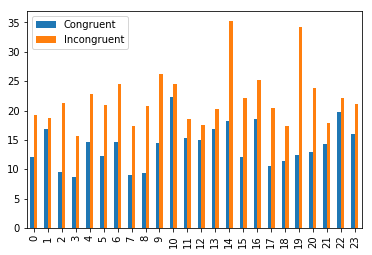

In [6]:
df_stroop.plot(kind='bar')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1c56d8bd30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1c56d986a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1c56d8bbe0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1c56d98f60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1c56da0400>,
 'means': []}

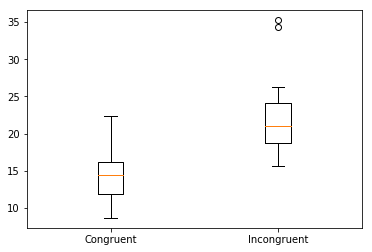

In [7]:
data =  [df_stroop.Congruent,df_stroop.Incongruent]
plt.boxplot(data,labels=['Congruent','Incongruent'])

--答案写这里--  
相同参与者对文件条件不一致的任务完成时间明显比文件条件一致的任务完成时间长,且存在异常值。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [12]:
# 在这里执行统计检验
ttest_rel(df_stroop['Congruent'],df_stroop['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

置信水平：95%  
显著性水平：alpha=0.05  
T统计值：-8.0207
样本统计量：N=24 
自由度：df=N-1=23
T临界值：1.7139  

p值 = 4.1030005857111781e-08 远小于显著性水平0.05  
故拒绝原假设，接收备选假设  
文件条件类型对参与者完成任务的时间和准确率存在影响（有关联）

**参考资料**  
https://support.minitab.com/zh-cn/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/what-is-a-critical-value/
https://baike.baidu.com/item/%E8%87%AA%E7%94%B1%E5%BA%A6/5936984?fr=aladdin
http://www.360doc.com/content/11/0222/09/77317_95004704.shtml